## Final Project Submission

Please fill out:
* Student name: Marvin Mills
* Student pace: part time
* Scheduled project review date/time: End of October
* Instructor name: Yish Lim
* Blog post URL:


In [174]:
# Your code here - remember to use markdown cells for comments as well!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy import stats

house_data = pd.read_csv('kc_house_data.csv')

In [2]:
house_data

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
0          5650     1.0         NaN   0.0  ...      7        1180   
1          7242     2.0         0.0   0.0  ...      7        2170   
2         10000     1.0         0.0   0.0  ...      6         770   
3          5000     1.0         0.0   0.0  ...      7        1050   
4          8080     1.0         0.0   0.0  ...      8        1680   
...         ...     ...         ...   ...  ...    ...         ...   
21592      1131     3.0         0.0   0.0  ...      8        1530   
21593      5813     2.0         0.0   0.0  ...      8        2310   
21594      1350     2.0         0.0   0.0  ...      7        1020   
21595      2388     2.0         NaN   0.0  ...      8        1600   
21596      1076     2.0         0.0   0.0  ...      7        1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0                0.0     1955           0.0    98178  47.5112 -122.257   
1              400.0     1951        1991.0    98125  47.7210 -122.319   
2                0.0     1933           NaN    98028  47.7379 -122.233   
3              910.0     1965           0.0    98136  47.5208 -122.393   
4                0.0     1987           0.0    98074  47.6168 -122.045   
...              ...      ...           ...      ...      ...      ...   
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

In [3]:
# For loop to sift through the unique values of select column, to get a better sense of the data.
# If unable to do this, then it quite possibly means the column's data has multiple datatypes.
# Also, this is a way to determine initially whether a variable is categorical, as well as check for NaN's.

def siftr(x):
    
    view_deets = house_data[x]
    storage = []

    for i in view_deets:
        if i in storage:
            continue
        elif i >= 0:
            storage.append(i)

    print(sorted(storage))

# house_data.columns
# to easily check the columns I want without scrolling up :)

In [193]:
# Changed a few column names so they better reflected what the data represents
house_data = house_data.rename(columns={"view":"times_viewed","waterfront":"has_waterfront"})

# Also changed NaNs to 0 value
house_data = house_data.fillna(0)

In [41]:
siftr('yr_renovated')

[0.0, 1934.0, 1940.0, 1944.0, 1945.0, 1946.0, 1948.0, 1950.0, 1951.0, 1953.0, 1954.0, 1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1962.0, 1963.0, 1964.0, 1965.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0]


In [194]:
house_data['sqft_basement'] = house_data['sqft_basement'].replace('?',0.0)

In [195]:
house_data['sqft_basement'] = house_data['sqft_basement'].astype(str).astype(float).astype(int)

In [196]:
#house_data['sqft_basement'].dtypes
siftr('sqft_basement')

[0, 10, 20, 40, 50, 60, 65, 70, 80, 90, 100, 110, 120, 130, 140, 143, 145, 150, 160, 170, 172, 176, 180, 190, 200, 207, 210, 220, 225, 230, 235, 240, 243, 248, 250, 260, 265, 266, 270, 274, 276, 280, 283, 290, 295, 300, 310, 320, 330, 340, 350, 360, 370, 374, 380, 390, 400, 410, 414, 415, 417, 420, 430, 435, 440, 450, 460, 470, 475, 480, 490, 500, 506, 508, 510, 515, 516, 518, 520, 530, 540, 550, 556, 560, 570, 580, 588, 590, 600, 602, 610, 620, 630, 640, 650, 652, 660, 666, 670, 680, 690, 700, 704, 710, 720, 730, 740, 750, 760, 768, 770, 780, 784, 790, 792, 800, 810, 820, 830, 840, 850, 860, 861, 862, 870, 875, 880, 890, 900, 906, 910, 915, 920, 930, 935, 940, 946, 950, 960, 970, 980, 990, 1000, 1008, 1010, 1020, 1024, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120, 1130, 1135, 1140, 1150, 1160, 1170, 1180, 1190, 1200, 1210, 1220, 1230, 1240, 1245, 1248, 1250, 1260, 1270, 1275, 1280, 1281, 1284, 1290, 1300, 1310, 1320, 1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 

---

BUSINESS CASE / PROBLEM:
--

In the decentralized finance world, fractional investment in tokenized real estate assets is in its infancy, but there is potential for this to transform the way we buy, sell and leverage real estate in the future. Homeowners are able to put up their homes as collateral by tokenizing the property and then receiving a loan, paid in the form of cryptocurrency up to a set amount, in relation to the housing price (better known as, LTV). Moreover, those interested in investing can purchase "parts" of a property, or "fractions," in much the same way crowdfund real estate works. Collective owners of a property can also decide whether to make upgrades or sell the property. <b>By allowing initial homeowners to take out a loan on their homes while also availing their asset to be invested in, there arises a need to have an accurate price forecast for home values before investment, and before taking a vote on which upgrades to do.</b> Having accurate house price predictions ensures that home owners who have taken out loans on their property properly collateralize their asset, so as to avoid a market fluctuation causing a liquidation event to occur and the owner potentially losing their real estate asset. As it relates to home upgrades, due to the highly diverse nature of the USA real estate market, blanket upgrade approaches are not sufficient. <b>Investors need a way to accurately predict after repair value of homes, with respect to region, especially because a significant amount of investors are outside of the USA.</b>

In [72]:
house_data.dtypes

id                  int64
date               object
price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
has_waterfront    float64
times_viewed      float64
condition           int64
grade               int64
sqft_above          int64
sqft_basement       int32
yr_built            int64
yr_renovated      float64
zipcode             int64
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
dtype: object

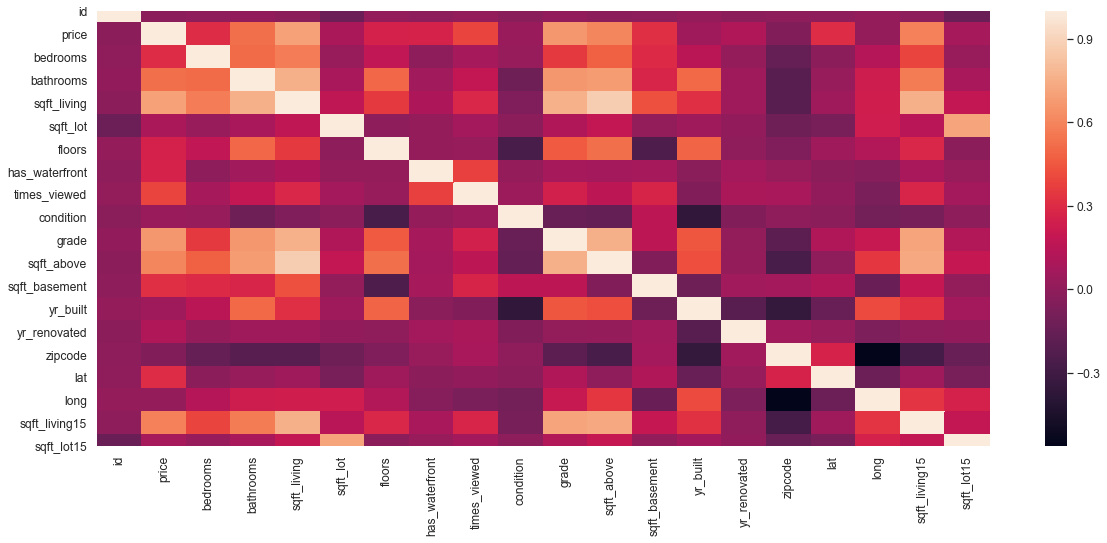

In [75]:
#checking on the correlation of the variables with a correlation matrix, for a quick eye test
        
f, ax = plt.subplots(figsize=(20, 8))
corr = house_data.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Notes on Correlation Matrix:
--

Some basic observations after an eye test:

1. It appears that "sqft_living" and "sqft_above" have a fairly high correlation.
2. It also appears that "price" has the strongest correlation with "sqft_living," "grade," "sqft_above," and "sqft_living15."
3. It seems that bathrooms have a higher correlation to "sqft_living" than do bedrooms.

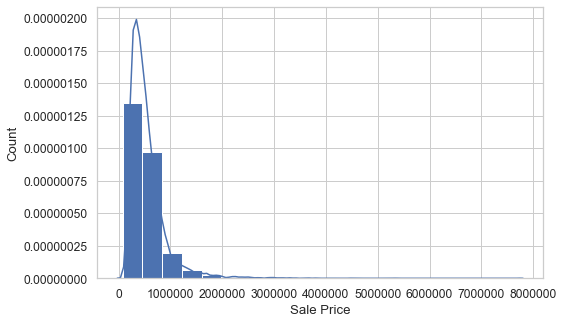

In [76]:
#Checking out the dependent variable which is the focus of the model.

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    house_data['price'], norm_hist=False, kde=True, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='Count');

In [83]:
# Checking on correlation between two variables using Pearson's
list1 = house_data['sqft_living']
list2 = house_data['bathrooms']

corr, _ = pearsonr(list1,list2)
corr

0.7557576009502522

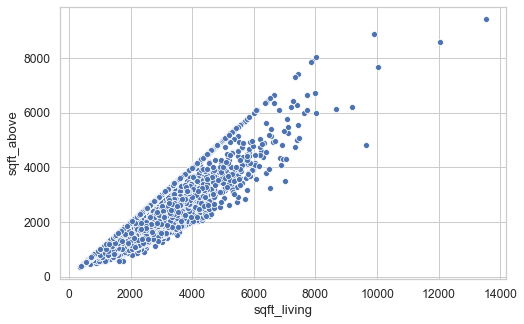

In [78]:
# The scatterplot showing the correlation between the two variables below.

sns.scatterplot(data=house_data, x="sqft_living", y="sqft_above")

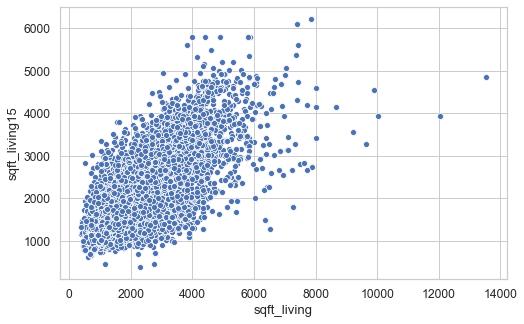

In [79]:
# The scatterplot showing the correlation between the two variables below.

sns.scatterplot(data=house_data, x="sqft_living", y="sqft_living15")

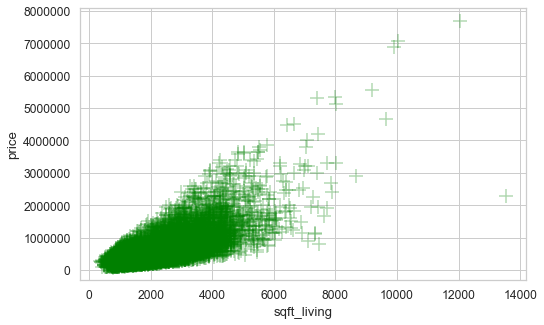

In [109]:
# The scatterplot showing the correlation between the single variable and target variable.

sns.regplot(x=house_data["sqft_living"], y=house_data["price"], marker="+", fit_reg=False, scatter_kws={"color":"green","alpha":0.3,"s":200})

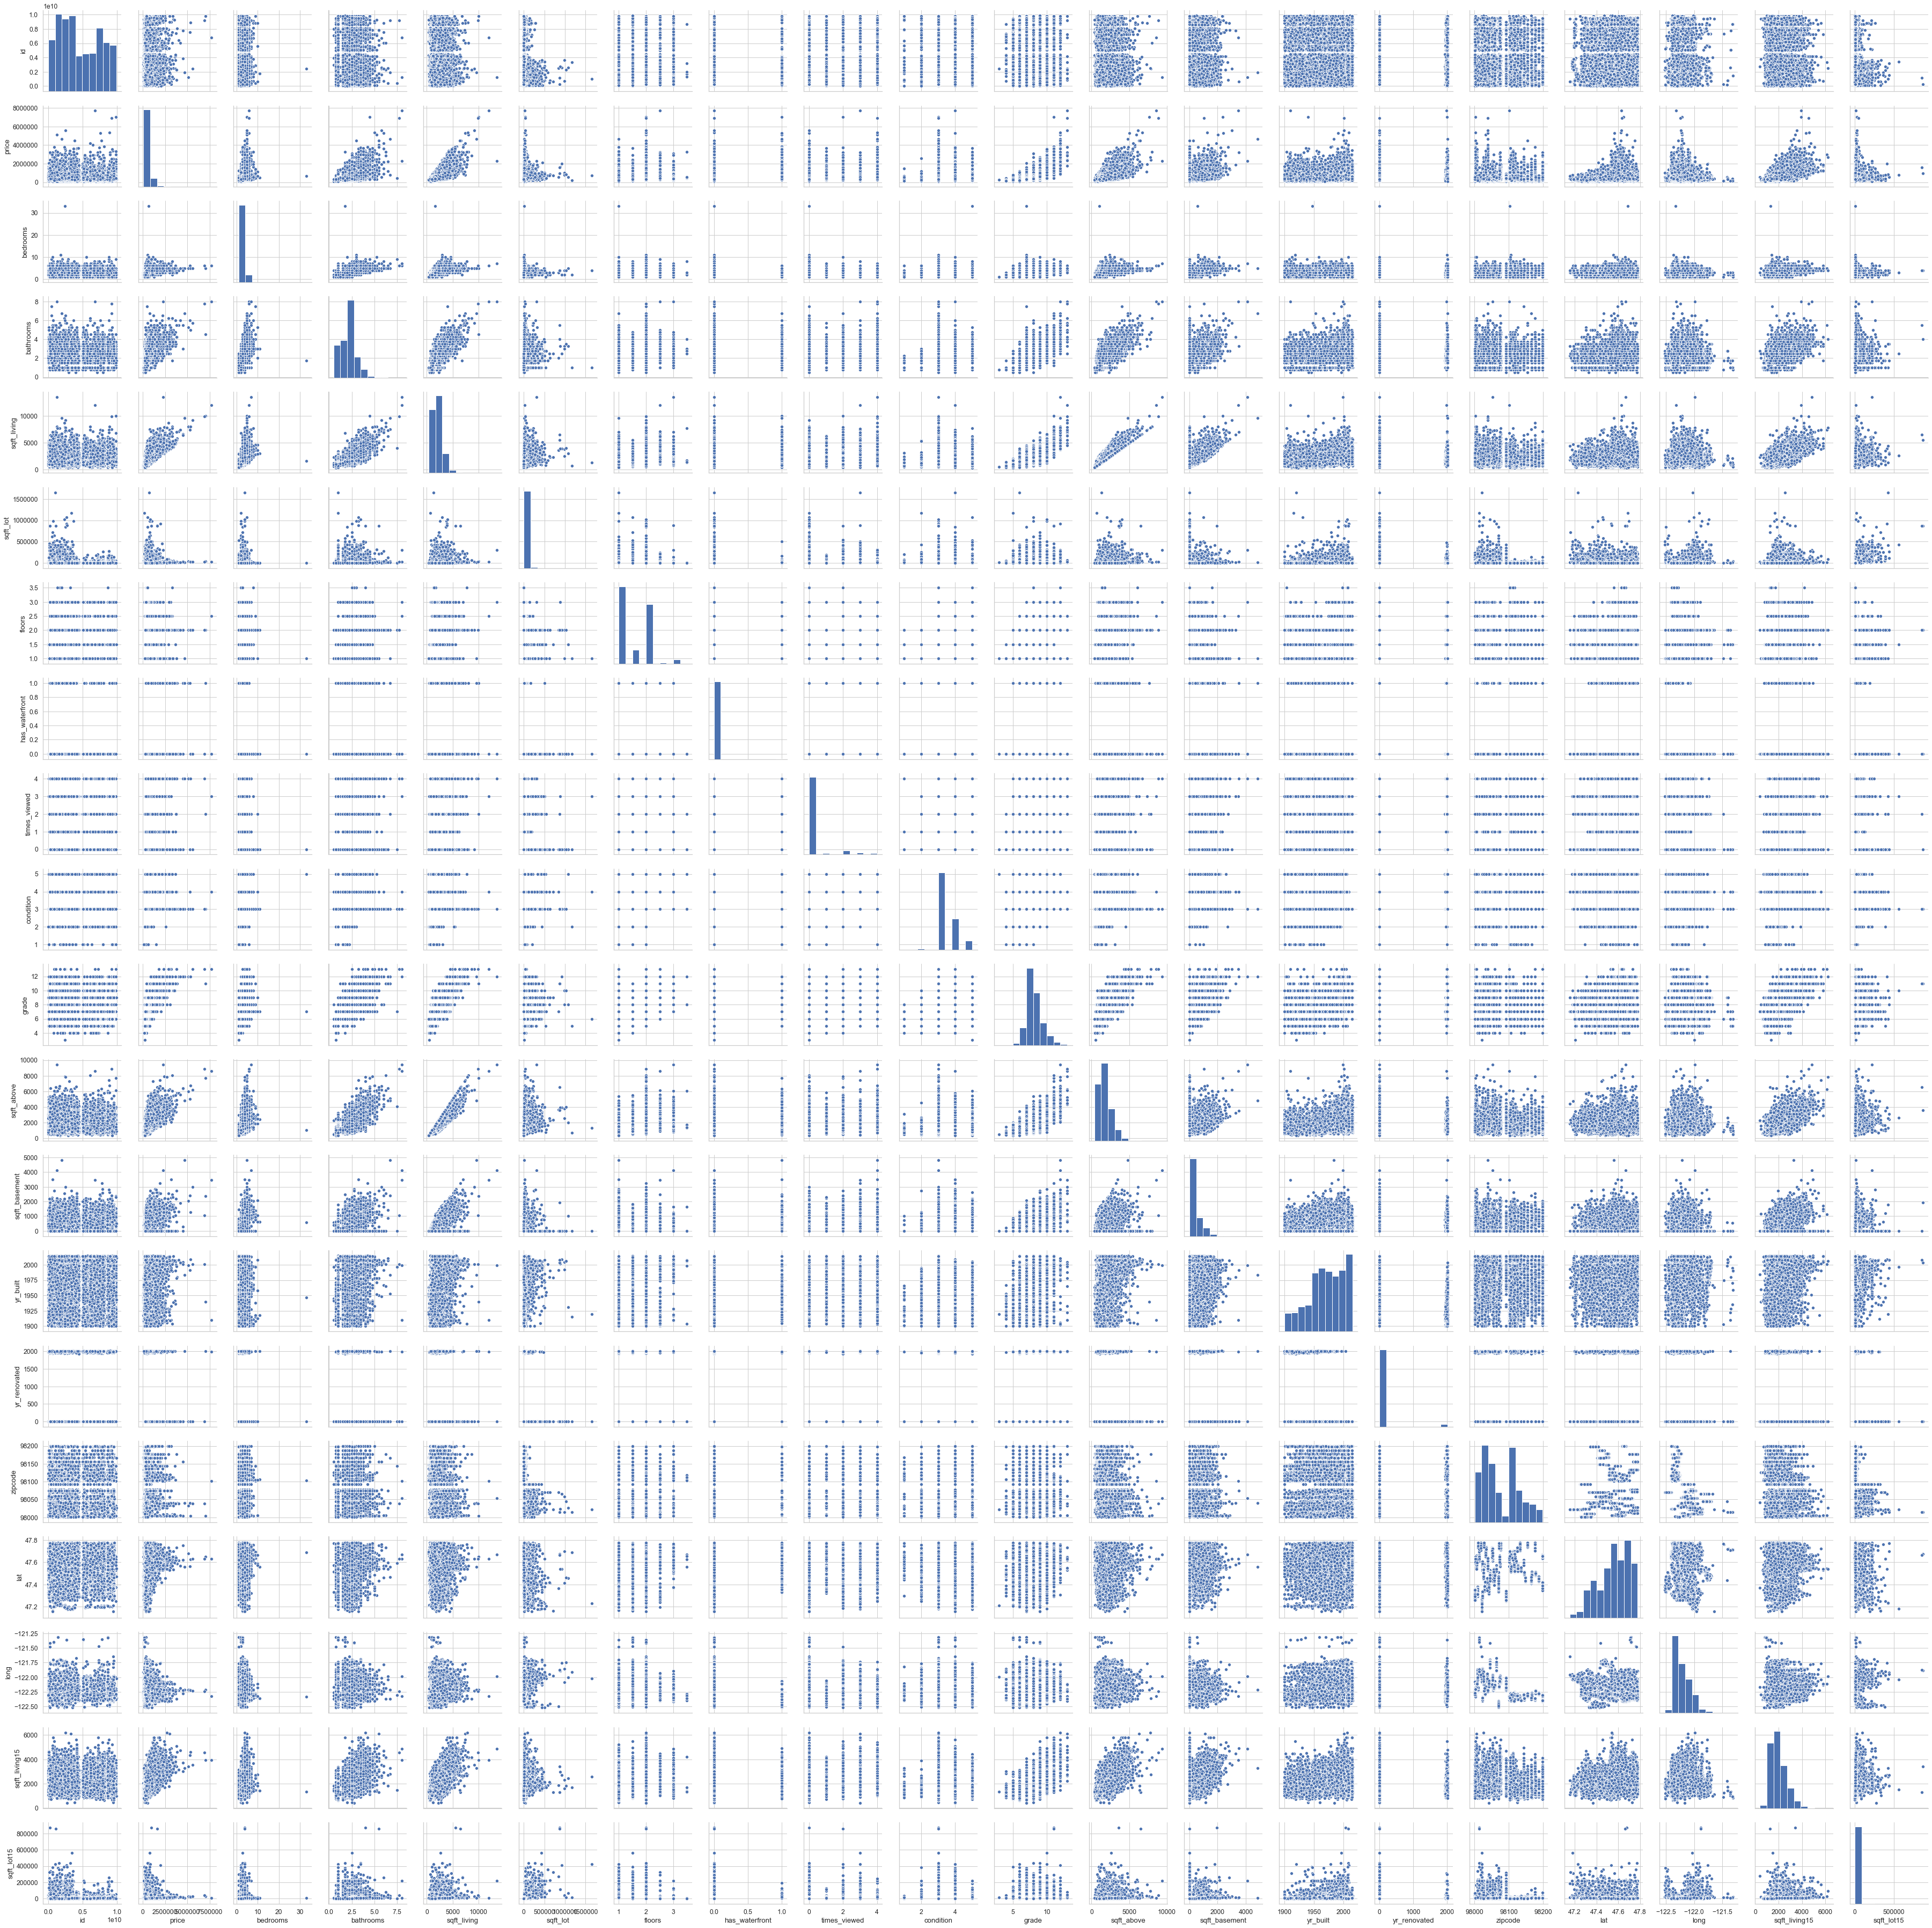

In [90]:
sns.pairplot(house_data)

In [108]:
# Checking correlation between square foot living and bathrooms.
list1 = house_data['sqft_living']
list2 = house_data['price']

corr, _ = pearsonr(list1,list2)
corr

0.7019173021377596

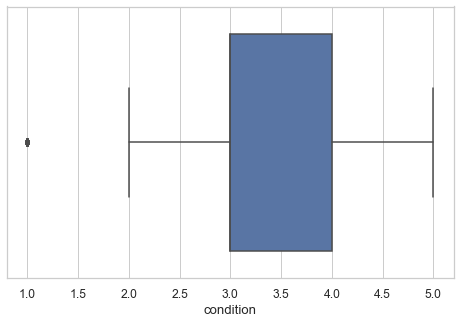

In [190]:
numericals = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','grade','sqft_above','sqft_basement',
             'yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']

sns.boxplot(x=house_data[numericals[6]])


In [183]:
# Checking for outliers
house_data['z_score_living'] = stats.zscore(house_data['sqft_living'])
#sorted(house_data['z_score_living'])

In [191]:
# Checking for outliers
house_data['z_score_condition'] = stats.zscore(house_data['condition'])
#sorted(house_data['z_score_condition'])

In [197]:
# Checking for outliers

house_data['z_score_bath'] = stats.zscore(house_data['bathrooms'])
house_data.loc[house_data['z_score_condition'].abs()>=3].head()

id       date     price  bedrooms  bathrooms  sqft_living  \
36    9435300030  5/28/2014  550000.0         4        1.0         1660   
380   1726059053  9/16/2014  270000.0         2        1.5         1380   
397   5175800060  6/23/2014  365000.0         4        2.0         1940   
1440  5694000710  11/7/2014  352950.0         3        1.0         1760   
1732   913000340   1/2/2015  252000.0         1        1.0          680   

      sqft_lot  floors  has_waterfront  times_viewed  ...  yr_built  \
36       34848     1.0             0.0           0.0  ...      1933   
380     209959     1.0             0.0           0.0  ...      1954   
397      25600     1.0             0.0           0.0  ...      1962   
1440      3000     1.5             0.0           0.0  ...      1900   
1732      1638     1.0             0.0           4.0  ...      1910   

      yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
36             0.0    98052  47.6621 -122.132           2160       11467   
380            0.0    98011  47.7461 -122.195           3130       19868   
397            0.0    98006  47.5722 -122.129           2000       10071   
1440           0.0    98103  47.6598 -122.348           1320        1266   
1732        1992.0    98116  47.5832 -122.399           1010        3621   

      z_score_bath  z_score_living  z_score_condition  
36       -1.451073       -0.457825            -3.7044  
380      -0.800849       -0.762807            -3.7044  
397      -0.150626       -0.152842            -3.7044  
1440     -1.451073       -0.348902            -3.7044  
1732     -1.451073       -1.525264            -3.7044  

[5 rows x 24 columns]

In [ ]:
# Remove selected outliers

Note Stop:
--

Based on the correlations, here are some decisions I'm making for the data:

- keep: <b>sqft_living15, bathrooms, sqft_living </b>
- make categorical: sqft_basement > <b>has_basement</b>
- drop: <b>sqft_above

In [ ]:
# Drop columns selected for deletion